## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
import keras


plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[6,5]

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

Let's load the dataset first.

In [55]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.data.shape)
print(digits.target)

X, y = digits.data, digits.target

(1797, 8, 8)
(1797, 64)
[0 1 2 ... 8 9 8]


### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning. 

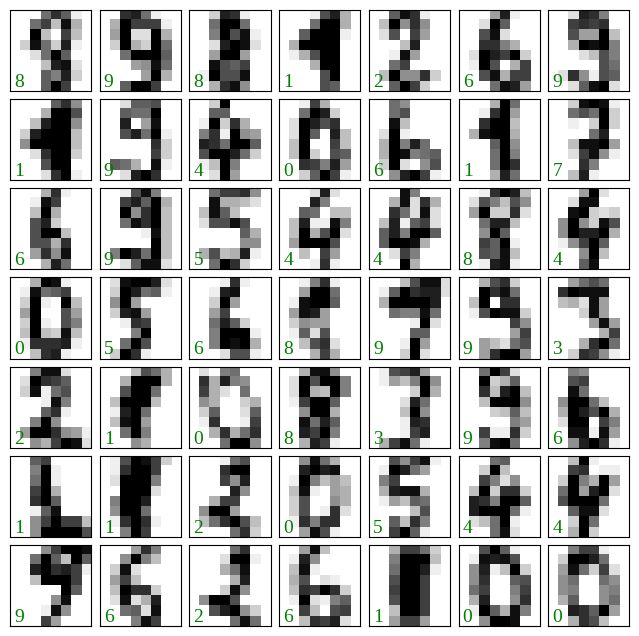

In [3]:
fig, axes = plt.subplots(7,7, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

Ok so the data is simply each pixel value within an $8\times 8$ grid.  For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?

### Dimensionality reduction

Let's use Isomap to perform a dimensionality reduction to our data.

In [4]:
isomap = Isomap(n_components=2)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

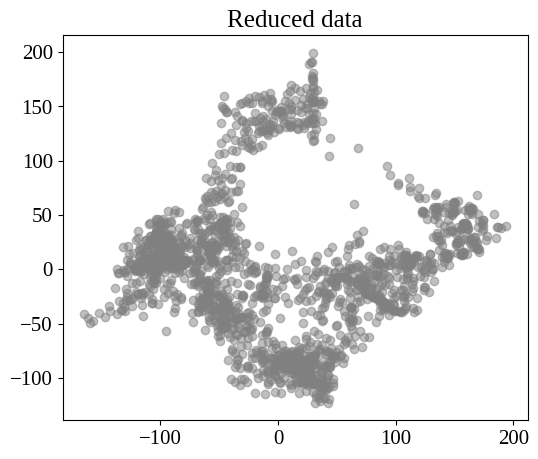

In [5]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='gray', alpha=0.5)
plt.title('Reduced data')
plt.show()

/tmp/ipykernel_2926/623377114.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)


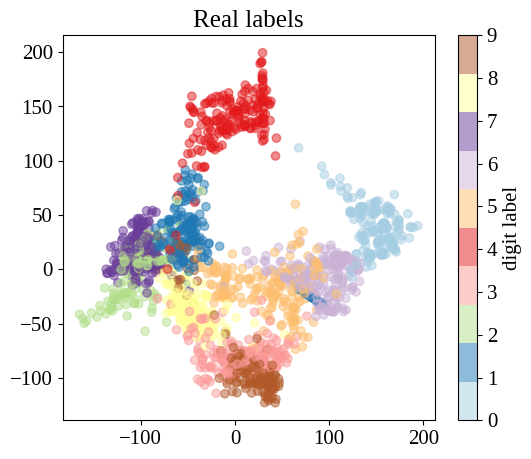

In [6]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)
plt.title('Real labels')

plt.colorbar(label='digit label', ticks=range(10))

plt.show()

If we consider the true labels, we can observe the presence of different groups of number. In particular some numbers (like 0, 4, 6) are well separated, but some others are still confused. 

Maybe we can try with a different algorithm, let's use TSNE

In [7]:
tsne = TSNE(n_components=2,learning_rate=200)
X_reduced_1 = tsne.fit_transform(X)

/tmp/ipykernel_2926/1898125895.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)


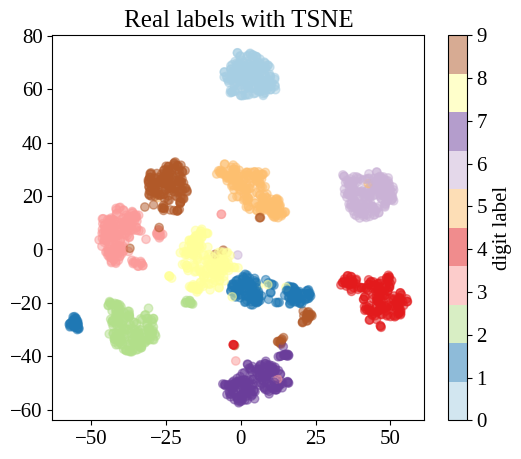

In [8]:
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)
plt.title('Real labels with TSNE')

plt.colorbar(label='digit label', ticks=range(10))

plt.show()

The result is really impressive! All the numbers are well separated, we can almost do the classification by eye.

### Classification

Perform now the classification. Start by splitting the data into a train set and a validation set. Classify then the numbers using [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), without performing any dimensionality reduction.

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2, train_size=0.8)
print(Xtrain.shape, Xtest.shape)

(1437, 64) (360, 64)


In [63]:
lr = LogisticRegression(max_iter=2000, solver='sag')
lr.fit(Xtrain, ytrain)

# predict labels of both trained and tested data
train_pred = lr.predict(Xtrain)
test_pred = lr.predict(Xtest)

In [83]:
accuracy_train = accuracy_score(ytrain, train_pred)
accuracy_test = accuracy_score(ytest, test_pred)

print('The accuracy of the training set is:', accuracy_train)
print('The accuracy of the test set is:', accuracy_test)

cm_train = confusion_matrix(ytrain, train_pred)
cm_test = confusion_matrix(ytest, test_pred)

print('\n Confusion matrix of the training set: \n',  cm_train)
print('\n Confusion matrix of the test set: \n',  cm_test)

The accuracy of the training set is: 1.0
The accuracy of the test set is: 0.9472222222222222

 Confusion matrix of the training set: 
 [[146   0   0   0   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 139   0   0   0   0]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 152]]

 Confusion matrix of the test set: 
 [[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


The result is quite impressive, about $95\%$ of the numbers of the test set have been classified correctly. In particular from the confusion matrix we can observe which numbers have been misclassified, for example three $4$ have been classified as $8$ and one as a $9$; or three $9$ have been classified as $3$, $5$ and $8$.

Compute the accuracy as a function of the number of dimensions.

In [13]:
accuracyTrain_vec=np.empty(63)
accuracyTest_vec=np.empty(63)

for i in range(1,64):
    isomap = Isomap(n_components=i)
    X_reduced = isomap.fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, random_state=2, train_size=0.8)
    lr = LogisticRegression(max_iter=2000, solver='sag')
    lr.fit(Xtrain, ytrain)
    train_pred = lr.predict(Xtrain)
    test_pred = lr.predict(Xtest)
    accuracyTrain_vec[i-1] = accuracy_score(ytrain, train_pred)
    accuracyTest_vec[i-1] = accuracy_score(ytest, test_pred)

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/

/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connect

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficien

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficien

The first number of dimensions with an accuracy greater than 0.95 is:  6


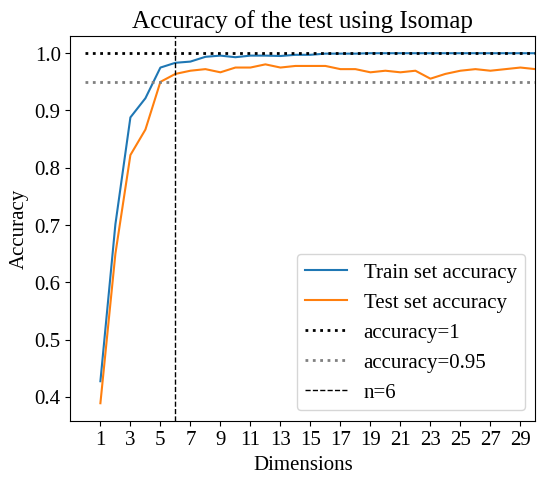

In [17]:
xgrid=np.arange(1,64,1)

treshold=xgrid[accuracyTest_vec>0.95]
treshold=treshold[0]
print('The first number of dimensions with an accuracy greater than 0.95 is: ', treshold)

plt.plot(xgrid, accuracyTrain_vec, label='Train set accuracy')
plt.plot(xgrid, accuracyTest_vec, label='Test set accuracy')
plt.title('Accuracy of the test using Isomap')
plt.hlines(1,0,30, ls='dotted', color='black', lw=2, label='accuracy=1')
plt.hlines(0.95,0,30, ls='dotted', color='grey', lw=2, label='accuracy=0.95')
plt.xlim(-1,30)
tick=np.arange(1,30,2)
plt.xticks(tick)
plt.axvline(treshold, color='black', ls='--', lw=1, label='n=6')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

We need only 6 components to have an accuracy of $95\%$, then the accuracy converges.

Let's try to increase the accuracy by performing a dimensionality reduction on the problem, in particular consider a reduction to 10 dimensions and then perform again the classification with [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [104]:
isomap_test = Isomap(n_components=10)
X_reduced_test = isomap_test.fit_transform(X)
Xtrain_r, Xtest_r, ytrain_r, ytest_r = train_test_split(X_reduced_test, y, random_state=2, train_size=0.8)

lr_test = LogisticRegression(max_iter=2000, solver='sag')
lr_test.fit(Xtrain_r, ytrain_r)

# predict labels of both trained and tested data
train_pred_test_r = lr_test.predict(Xtrain_r)
test_pred_test_r = lr_test.predict(Xtest_r)

accuracy_train_test_r = accuracy_score(ytrain_r, train_pred_test_r)
accuracy_test_test_r = accuracy_score(ytest_r, test_pred_test_r)

print('The accuracy of the training set is:', accuracy_train_test_r)
print('The accuracy of the test set is:', accuracy_test_test_r)

cm_train_test_r = confusion_matrix(ytrain_r, train_pred_test_r)
cm_test_test_r = confusion_matrix(ytest_r, test_pred_test_r)

print('\n Confusion matrix of the training set: \n',  cm_train_test_r)
print('\n Confusion matrix of the test set: \n',  cm_test_test_r)

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


The accuracy of the training set is: 0.9930410577592206
The accuracy of the test set is: 0.975

 Confusion matrix of the training set: 
 [[146   0   0   0   0   0   0   0   0   0]
 [  0 137   0   0   0   0   0   0   1   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   1]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 138   0   0   0   1]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   3   0   0   0   0   0   0 134   1]
 [  0   0   0   1   0   1   0   0   1 149]]

 Confusion matrix of the test set: 
 [[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  0  0]
 [ 0  0  0  0 32  0  0  2  0  1]
 [ 0  1  0  0  0 41  0  0  0  1]
 [ 0  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  1  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0 28]]


The accuracy of the test set increased, now we have an accuracy of $97.5\%$, the vast majority of the numbers have been correctly classified.

But we previously observed that, with a TSNE dimensionality reduction, the different numbers are well separated. Use another classification algorithm: [`SVC`](https://scikitlearn.org/stable/modules/generated/sklearn.svm.SVC.html) with the Radial Basis Function (RBF) kernel.

In [71]:
#try with TSNE

Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(X_reduced_1, y, random_state=8, train_size=0.8)
print(Xtrain_1.shape, Xtest_1.shape)

(1437, 2) (360, 2)


In [72]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf',C=10)
clf.fit(Xtrain_1, ytrain_1)

# predict labels of both trained and tested data
train_pred_1 = clf.predict(Xtrain_1)
test_pred_1 = clf.predict(Xtest_1)

In [73]:
accuracy_train_1 = accuracy_score(ytrain_1, train_pred_1)
accuracy_test_1 = accuracy_score(ytest_1, test_pred_1)

print('The accuracy of the training set is:', accuracy_train_1)
print('The accuracy of the test set is:', accuracy_test_1)

cm_train_1 = confusion_matrix(ytrain_1, train_pred_1)
cm_test_1 = confusion_matrix(ytest_1, test_pred_1)

print('\n Confusion matrix of the training set: \n',  cm_train_1)
print('\n Confusion matrix of the test set: \n',  cm_test_1)

The accuracy of the training set is: 0.988169798190675
The accuracy of the test set is: 0.9944444444444445

 Confusion matrix of the training set: 
 [[144   0   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0]
 [  0   0   0 141   0   0   0   2   0   2]
 [  0   0   0   0 155   0   0   0   0   0]
 [  0   0   0   0   0 131   1   0   0   1]
 [  0   0   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 138   0   1]
 [  0   2   0   0   0   0   0   0 139   0]
 [  0   0   0   2   1   2   0   0   2 139]]

 Confusion matrix of the test set: 
 [[34  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


The classification is almost perfect! Only two numbers have been misclassified (two $8$ as $1$); with an accuracy of $99.4\%$ this result is very impressive.

### Neural Networks

The data are images, try to use a deeplearning tecnique to classify the data.

In [52]:
X_NN, y_NN = digits.images, digits.target
X_train, X_test, y_train, y_test = train_test_split(X_NN, y_NN, random_state=2, train_size=0.8)

X_train = X_train/16
X_test = X_test/16

print(X_train.shape)

(1437, 8, 8)


In [53]:
# Let's make a list of class names that we can refer to.
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [54]:
keras.backend.clear_session() # Make sure that we are starting a new model and not adding to an earlier one
np.random.seed(42) # Set the numpy and tensorflow random seeds so that we all get the same answer
tf.random.set_seed(42)

In [35]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


# Need to reshape for CNN
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

print(len(X_train))
print(X_train.shape)
print(X_test.shape)

1437
(1437, 8, 8, 1)
(360, 8, 8, 1)


The model is acombination of **2D Convolution layers** (feature finding), **Max Pooling layers** (data reduction), followed by some **Dense layers** (fully-connected layers at the end of the network for classification) and some **Dropout** incorporated to strengthen the overall network and make sure all the neurons are actually pulling their weight.

In [96]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[8, 8, 1]),
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),  
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])   

In [97]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 256)        

In [98]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
clf = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
45/45 [==============================] - 3s 24ms/step - loss: 2.2257 - accuracy: 0.1552
Epoch 2/50
45/45 [==============================] - 1s 25ms/step - loss: 1.6611 - accuracy: 0.3556
Epoch 3/50
45/45 [==============================] - 1s 24ms/step - loss: 0.8706 - accuracy: 0.6834
Epoch 4/50
45/45 [==============================] - 1s 23ms/step - loss: 0.5127 - accuracy: 0.8205
Epoch 5/50
45/45 [==============================] - 1s 24ms/step - loss: 0.3194 - accuracy: 0.9061
Epoch 6/50
45/45 [==============================] - 1s 22ms/step - loss: 0.2115 - accuracy: 0.9429
Epoch 7/50
45/45 [==============================] - 1s 23ms/step - loss: 0.1694 - accuracy: 0.9478
Epoch 8/50
45/45 [==============================] - 1s 24ms/step - loss: 0.1413 - accuracy: 0.9652
Epoch 9/50
45/45 [==============================] - 1s 22ms/step - loss: 0.1258 - accuracy: 0.9715
Epoch 10/50
45/45 [==============================] - 1s 22ms/step - loss: 0.0801 - accuracy: 0.9798
Epoch 11/

In [99]:
train_pred_NN = np.argmax(model.predict(X_train), axis=-1)
test_pred_NN = np.argmax(model.predict(X_test), axis=-1)

12/12 [==============================] - 0s 3ms/step


In [100]:
print(train_pred_NN)

[9 2 2 ... 1 1 5]


In [101]:
accuracy_train_NN = accuracy_score(y_train, train_pred_NN)
accuracy_test_NN = accuracy_score(y_test, test_pred_NN)

print('The accuracy of the training set is:', accuracy_train_NN)
print('The accuracy of the test set is:', accuracy_test_NN)

cm_train_NN = confusion_matrix(y_train, train_pred_NN)
cm_test_NN = confusion_matrix(y_test, test_pred_NN)

print('\n Confusion matrix of the training set: \n',  cm_train_NN)
print('\n Confusion matrix of the test set: \n',  cm_test_NN)

The accuracy of the training set is: 1.0
The accuracy of the test set is: 0.9777777777777777

 Confusion matrix of the training set: 
 [[146   0   0   0   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 139   0   0   0   0]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 152]]

 Confusion matrix of the test set: 
 [[31  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  1 34  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  0  3]
 [ 0  1  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 28]]


Also in this case we obtained a result that is quite perfect, with an accuracy of about $98\%$; only 7 numbers out of 360 have been misclassified.

### Summary

In [109]:
from tabulate import tabulate

classifier=np.array(["Logistic Regression", "LR with Isomap", "SVC with TSNE", "Keras"])
accuracy_train_table=np.array([accuracy_train, accuracy_train_test_r, accuracy_train_1, accuracy_train_NN])
accuracy_test_table=np.array([accuracy_test, accuracy_test_test_r, accuracy_test_1, accuracy_test_NN])

results = np.array([classifier, accuracy_train_table, accuracy_test_table]).T

col_names=["method", "accuracy train", "accuracy test"]

print(tabulate(results, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤══════════════════╤═════════════════╕
│ method              │   accuracy train │   accuracy test │
╞═════════════════════╪══════════════════╪═════════════════╡
│ Logistic Regression │         1        │        0.947222 │
├─────────────────────┼──────────────────┼─────────────────┤
│ LR with Isomap      │         0.993041 │        0.975    │
├─────────────────────┼──────────────────┼─────────────────┤
│ SVC with TSNE       │         0.98817  │        0.994444 │
├─────────────────────┼──────────────────┼─────────────────┤
│ Keras               │         1        │        0.977778 │
╘═════════════════════╧══════════════════╧═════════════════╛


In the end all the 4 algorithms provide excellent results, with accuracies from $94.7\%$ on the raw data up to $99.4\%$ by processing the data before the classification.